In [1]:
#pip install pycaret

In [2]:
import pandas as pd
import numpy as np

In [3]:
from pycaret.clustering import *

In [4]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [5]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [6]:
setup(df)

,Description,Value
0,session_id,4984
1,Original Data,"(18885, 12)"
2,Missing Values,True
3,Numeric Features,2
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(18885, 354)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

([],
 True,
 None,
 'lightgbm',
 'UNSUPERVISED_DUMMY_TARGET',
 {'silhouette': <pycaret.containers.metrics.clustering.SilhouetteMetricContainer at 0x7fcfeae8ad90>,
  'chs': <pycaret.containers.metrics.clustering.CHSMetricContainer at 0x7fcfeae8ae10>,
  'db': <pycaret.containers.metrics.clustering.DBMetricContainer at 0x7fcfeae8ae90>,
  'hs': <pycaret.containers.metrics.clustering.HSMetricContainer at 0x7fcfeae8af10>,
  'ari': <pycaret.containers.metrics.clustering.ARIMetricContainer at 0x7fcfeae8af90>,
  'cs': <pycaret.containers.metrics.clustering.CSMetricContainer at 0x7fcfeae91090>},
        Activity Period  Operating Airline Operating Airline IATA Code  \
 0               200507       ATA Airlines                          TZ   
 1               200507       ATA Airlines                          TZ   
 2               200507       ATA Airlines                          TZ   
 3               200507         Air Canada                          AC   
 4               200507         Air C

In [7]:
kmeans=create_model('kmeans',num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7853,94154.6128,0.4146,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4984, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [8]:
plot_model(kmeans)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
plot_model(kmeans, feature='Passenger Count', label=True)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [10]:
plot_model(kmeans, feature='Operating Airline', label=True)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [14]:
plot_model(kmeans,plot='tsne')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


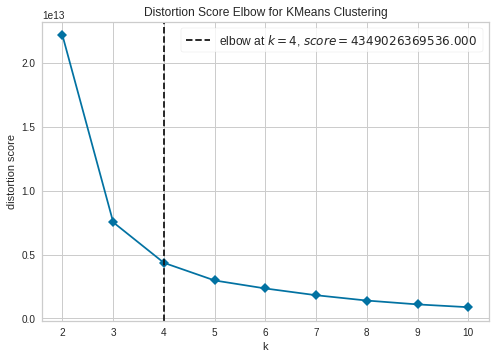

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [12]:
plot_model(kmeans,plot='elbow')

we can see that the number of clusters should be 4

In [13]:
# PCA - Principal Component Analysis - Dimension Reduction (Boyut kücültme)
# cok sütünlu veriyi 2 sutüna indiriyor, vektor gibi gösterme